<a href="https://colab.research.google.com/github/GianmarcoAndreana/NNDL/blob/main/Perceptron_Rosenblatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
####################
#wget file
####################
!wget https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip
!unzip breast+cancer+wisconsin+diagnostic.zip
!ls
#!cat wdbc.data
#!cat wdbc.names

--2025-02-25 20:16:22--  https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘breast+cancer+wisconsin+diagnostic.zip’

breast+cancer+wisco     [ <=>                ]  50.08K  --.-KB/s    in 0.1s    

2025-02-25 20:16:23 (360 KB/s) - ‘breast+cancer+wisconsin+diagnostic.zip’ saved [51284]

Archive:  breast+cancer+wisconsin+diagnostic.zip
  inflating: wdbc.data               
  inflating: wdbc.names              
breast+cancer+wisconsin+diagnostic.zip	sample_data  wdbc.data	wdbc.names


In [2]:
####################
#import to pandas
####################
import pandas as pd

# Load the dataset to inspect its contents
file_path = 'wdbc.data'
data = pd.read_csv(file_path, header=None)

# Assign column names based on the Breast Cancer Wisconsin dataset documentation
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data.columns = columns

# Display the first few rows to understand the structure
data.head()

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
####################
#convert data to numpy
####################
import numpy as np

# Convert the diagnosis column into numerical values for plotting (M = 1, B = -1)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': -1})

# Extract features&labels from pandas df and convert to numpy arrays (.value)
X = data[['Feature_1', 'Feature_2']].values
y = data['Diagnosis'].values

#NOTE: X is a 569 x 2 matrix: a row per sample, a column per feature

Predictions: [-1  1  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1
  1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1 -1
  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -

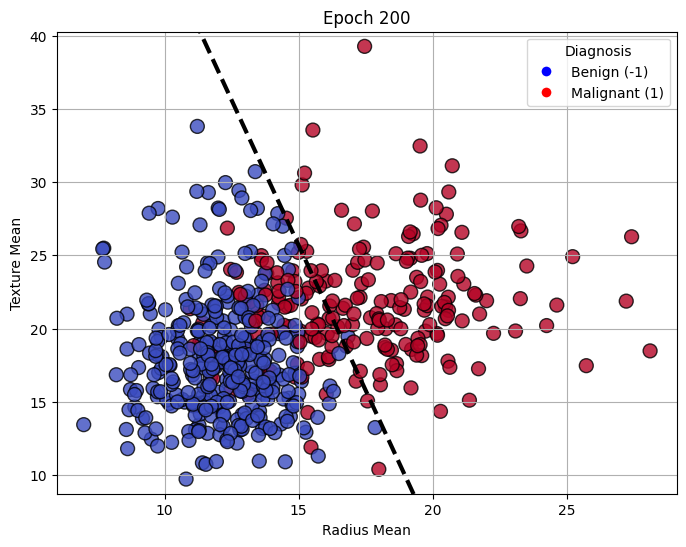

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Modified Perceptron class with weight history recording
class Perceptron:
    def __init__(self, learning_rate=1.0, n_epochs=1000, random_state=1):
        """
        Initialize the perceptron.

        Parameters:
        - learning_rate: step size for weight updates.
        - n_epochs: maximum number of epochs for training.
        - random_state: seed for random weight initialization.
        """
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.weights = None
        self.weights_history = []  # Will store the weight vector after each epoch

    def fit(self, X, y):
        """
        Fit the perceptron model to the training data.

        Parameters:
        - X: array-like, shape = [n_samples, n_features]
             Training vectors.
        - y: array-like, shape = [n_samples]
             Target values (must be +1 or -1).
        """
        n_samples, n_features = X.shape

        # Initialize weights (including bias as weights[0])
        rng = np.random.RandomState(self.random_state)
        self.weights = rng.normal(loc=0.0, scale=0.01, size=n_features + 1)

        for epoch in range(self.n_epochs):
            errors = 0
            for xi, target in zip(X, y):
                # compute the prediction for sample xi
                update = self.learning_rate * (target - self.predict_single(xi))
                # update the weight vector and bias (weights[0] is the bias)
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            # save a copy of the weights after this epoch
            self.weights_history.append(self.weights.copy())
            # optionally, stop if there are no misclassifications
            if errors == 0:
                print(f"converged after {epoch} epochs")
                break
        return self

    def net_input(self, X):
        """Calculate the net input (linear combination plus bias)."""
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict_single(self, xi):
        """
        Predict the class label for a single sample.
        Returns 1 if net input is >= 0, else returns -1.
        """
        return 1 if self.net_input(xi) >= 0.0 else -1

    def predict(self, X):
        """
        Predict the class labels for an array of samples.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# ---------------------------
# Prepare the simple dataset
# ---------------------------
# X = np.array([[2, 3],
#               [1, 1],
#               [2, 1],
#               [3, 1],
#               [1, 0],
#               [7, 8],
#               [8, 8],
#               [9, 8],
#               [7, 7],
#               [8, 7]])
# # Class labels: first 5 are -1, last 5 are +1
# y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])


# ---------------------------
# Train the perceptron
# ---------------------------
# Set n_epochs=101 so we have the weight state after epoch 100
ppn = Perceptron(learning_rate=0.1, n_epochs=201)
ppn.fit(X, y)

# (Optional) Print predictions
predictions = ppn.predict(X)
weights = ppn.weights_history[-1]
print("Predictions:", predictions)
print("Weights:", weights)

# ---------------------------
# Set up the plot for animation
# ---------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data points (colored by class)
scatter = ax.scatter(
    X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.8, marker="o", s=100
)
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax.set_xlabel("Radius Mean")
ax.set_ylabel("Texture Mean")
ax.grid(True)

# Prepare a line object for the decision boundary
(line,) = ax.plot([], [], "--", color="black", lw=3, label="Decision Boundary")
# ax.legend()

# Legend for the plot
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Benign (-1)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Malignant (1)')
]
ax.legend(handles=handles, title='Diagnosis')

# ---------------------------
# Define the frames we want in the GIF
# ---------------------------
# We want frames at epochs: 10, 15, 20, ... up to 100.
# (Ensure that these indices exist in weights_history)
frames = list(range(10, 201, 5))
# frames = list(range(1, 10, 1)) # use with simpler version

# Initialization function: clear the decision boundary line
def init():
    line.set_data([], [])
    return (line,)


# Update function: update the decision boundary for the given epoch
def update(epoch):
    weights = ppn.weights_history[epoch]
    x_vals = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    # Avoid division by zero in case weights[2] is very small
    if np.abs(weights[2]) < 1e-5:
        weights[2] = 1e-5
    y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
    line.set_data(x_vals, y_vals)
    ax.set_title(f"Epoch {epoch}")
    return (line,)


# Create the animation
anim = animation.FuncAnimation(
    fig,
    update,
    frames=frames,
    init_func=init,
    blit=True,
    interval=500,  # milliseconds between frames
)

# Save the animation as a GIF (requires Pillow)
anim.save("perceptron_training_intervals.gif", writer="pillow")
plt.show()